In [1]:
# Import necessary libraries
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [9]:
# Load your dataset (replace 'your_data.csv' with your actual file)
data = pd.read_csv('C:/Users/Lenovo/Desktop/Wide_screen_Desktop_IRESSEF/Prostate_Cancer.csv')

In [11]:
# Prepare data
# Assuming the last column is the target variable
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target

In [13]:
X

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry
0,1,M,23,12,151,954,0.143,0.278,0.242
1,2,B,9,13,133,1326,0.143,0.079,0.181
2,3,M,21,27,130,1203,0.125,0.160,0.207
3,4,M,14,16,78,386,0.070,0.284,0.260
4,5,M,9,19,135,1297,0.141,0.133,0.181
...,...,...,...,...,...,...,...,...,...
95,96,M,23,16,132,1264,0.091,0.131,0.210
96,97,B,22,14,78,451,0.105,0.071,0.190
97,98,B,19,27,62,295,0.102,0.053,0.135
98,99,B,21,24,74,413,0.090,0.075,0.162


In [15]:
y

0     0.079
1     0.057
2     0.060
3     0.097
4     0.059
      ...  
95    0.056
96    0.066
97    0.069
98    0.066
99    0.064
Name: fractal_dimension, Length: 100, dtype: float64

In [27]:
# Encodage
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['diagnosis_result'] = le.fit_transform(X['diagnosis_result'])  # Encodes the target variable (e.g., 'A' becomes 0, 'B' becomes 1)

In [29]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [31]:
# Create XGBoost regression model
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

In [33]:
# Train the model
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [35]:
# Make predictions
y_pred = model.predict(X_test)

In [37]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [39]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 0.00
R-squared: 0.75


<Figure size 1000x600 with 0 Axes>

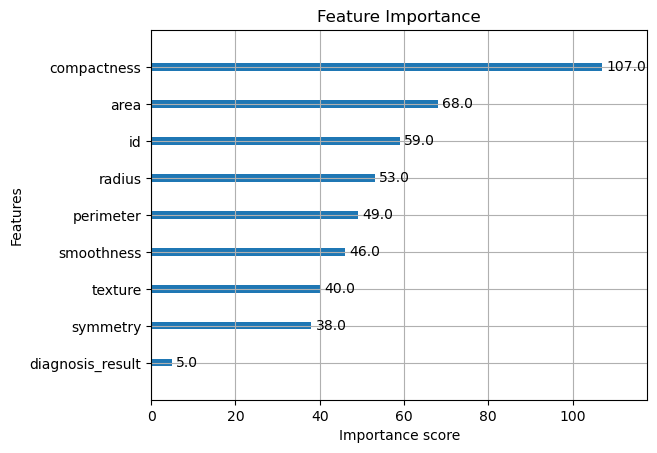

In [41]:
# Feature importance plot
plt.figure(figsize=(10, 6))
xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

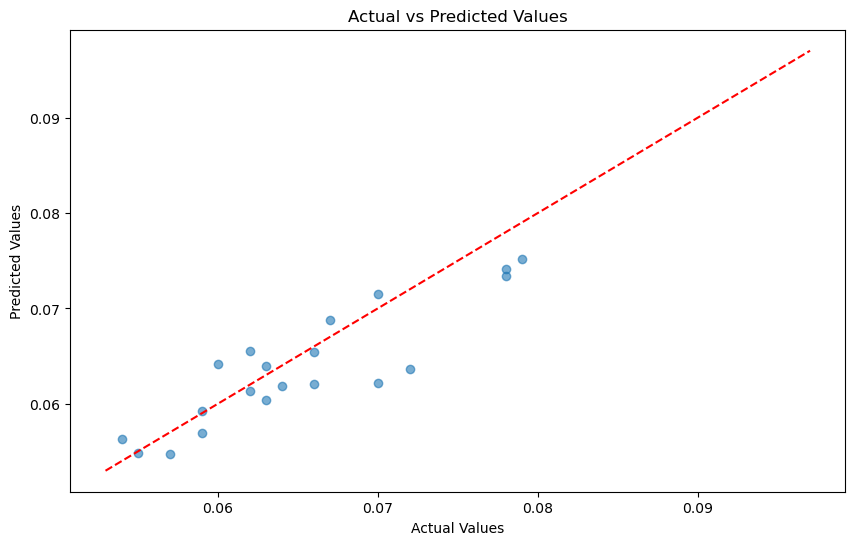

In [43]:
# Actual vs Predicted values plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

    Data Preparation:

        The code assumes your data is in a CSV file with the target variable in the last column

        Modify the pd.read_csv() line to match your data source

        Handle missing values and categorical variables before using this code

    Model Parameters:

        n_estimators: Number of trees in the model

        learning_rate: Step size shrinkage to prevent overfitting

        max_depth: Maximum tree depth

        subsample: Fraction of samples used for training

        colsample_bytree: Fraction of features used for training

    Hyperparameter Tuning:

        Consider using GridSearchCV or RandomizedSearchCV for parameter optimization

        Important parameters to tune: learning_rate, max_depth, n_estimators, subsample

    Interpretation:

        The feature importance plot shows which features contribute most to predictions

        The actual vs predicted plot helps visualize model accuracy

    Advanced Options:

        Early stopping: Add early_stopping_rounds and eval_set parameters

        Cross-validation: Use xgb.cv() for more robust evaluation

        Custom loss functions: Define through feval parameter

Remember to:

    Scale/normalize features if necessary

    Handle categorical variables (XGBoost can handle these natively)

    Consider feature engineering based on your domain knowledge

    Monitor for overfitting using validation curves

For time series regression problems, you'll need to:

    Create time-based features

    Use appropriate cross-validation techniques

    Consider lag features and rolling statistics
